In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
class FirstGenerator:
    def __init__(self, lam):
        self.lam = lam

    def generate_number(self):
        return (-1 / self.lam) * math.log(random.random())

    def calculate_distribution(self, x):
        return 1 - math.exp(-self.lam * x)

In [3]:
class SecondGenerator:
    def __init__(self, a, sigma):
        self.a = a
        self.sigma = sigma

    def generate_number(self):
        u = sum(random.random() for _ in range(12)) - 6
        return self.sigma * u + self.a

    def calculate_distribution(self, x):
        return (1 + math.erf((x - self.a) / (math.sqrt(2) * self.sigma))) / 2
        # return ((1 / (self.sigma * math.sqrt(2 * math.pi))) * math.exp(-((x - self.alpha) ** 2) / (2 * self.sigma ** 2)))

In [4]:
class ThirdGenerator:
    def __init__(self, a, c):
        self.a = a
        self.c = c
        self.z = random.random()

    def generate_number(self):
        self.z = math.fmod(self.a * self.z, self.c)
        return self.z / self.c

    def calculate_distribution(self, x):
        return max(0, min(1, x))

In [5]:
def calc_counts_in_interval(numbers, interval_count):
    min_val, max_val = min(numbers), max(numbers)
    interval_size = (max_val - min_val) / interval_count
    counts = [0] * interval_count

    for num in numbers:
        index = int((num - min_val) / interval_size)
        if num == max_val:
            index -= 1
        counts[index] += 1

    return counts, interval_size

In [6]:
def calc_chi_value(calculate_distribution, numbers, interval_count):
    counts, interval_size = calc_counts_in_interval(numbers, interval_count)
    min_val = min(numbers)
    x2 = 0
    left_index = 0
    count_in_interval = 0

    for i in range(interval_count):
        count_in_interval += counts[i]
        if count_in_interval < 5 and i != interval_count - 1:
            continue

        left = min_val + interval_size * left_index
        right = min_val + interval_size * (i + 1)
        expected = len(numbers) * (calculate_distribution(right) - calculate_distribution(left))

        x2 += (count_in_interval - expected) ** 2 / expected
        left_index = i + 1
        count_in_interval = 0

    return x2

In [7]:
def check_chi_value(calculate_distribution, numbers, interval_count, significance_level):
    x2 = calc_chi_value(calculate_distribution, numbers, interval_count)
    degrees_of_freedom = interval_count - 3
    x2_table = stats.chi2.ppf(1 - significance_level, degrees_of_freedom)
    return x2, x2_table, x2 < x2_table

In [8]:

def analyze_generator(generator, number_count, interval_count, significance_level):
    numbers = [generator.generate_number() for _ in range(number_count)]
    avg = sum(numbers) / len(numbers)
    var = sum((x - avg) ** 2 for x in numbers) / len(numbers)
    x2, x2_table, hypothesis_ok = check_chi_value(generator.calculate_distribution, numbers, interval_count, significance_level)

    plt.hist(numbers, bins=30, edgecolor='black')
    plt.title(f'Histogram of {generator.__class__.__name__}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    print(f'avg={avg:.5f}')
    print(f'var={var:.5f}')
    print(f'x2={x2:.5f}')
    print(f'x2_table={x2_table:.5f}')
    print(f'Hypothesis OK={hypothesis_ok}')

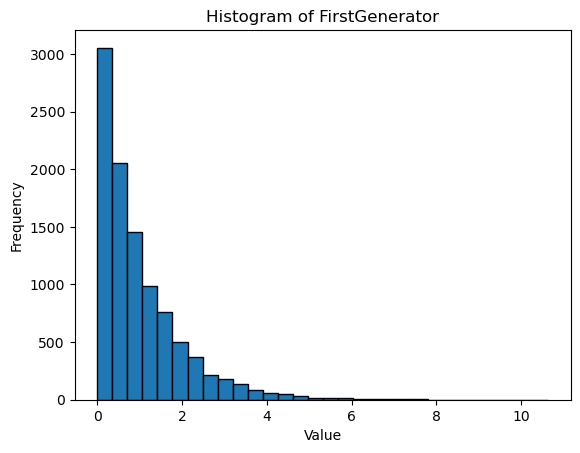

avg=1.00418
var=1.02868
x2=8.87380
x2_table=27.58711
Hypothesis OK=True


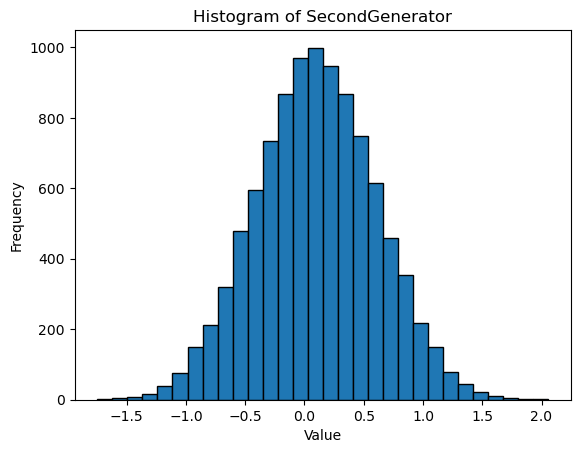

avg=0.09655
var=0.25651
x2=18.21948
x2_table=27.58711
Hypothesis OK=True


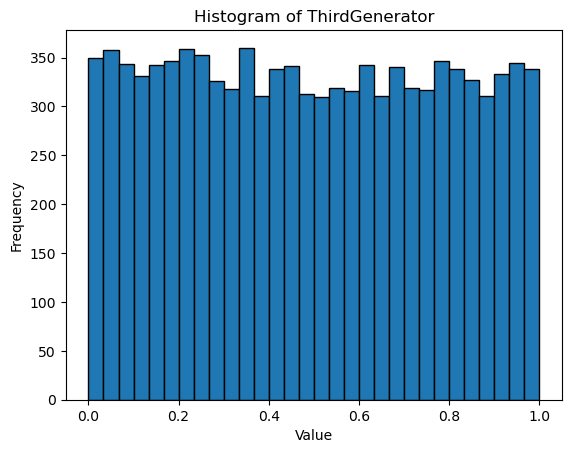

avg=0.49521
var=0.08464
x2=19.91444
x2_table=27.58711
Hypothesis OK=True


In [9]:
number_count = 10000
interval_count = 20
significance_level = 0.05

generators = [
    FirstGenerator(1), 
    SecondGenerator(0.1, 0.5), 
    ThirdGenerator(5 ** 13, 2 ** 31), 
]

for gen in generators:
    analyze_generator(gen, number_count, interval_count, significance_level)

